# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [9]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
# os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [11]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [12]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))

# reshaping - Report 4 - Question 1
data_train = resize_images(data_train, (28,28))
data_test = resize_images(data_test, (28,28))

"""
# reshaping - Report 4 - Question 3 - 20 x 20 size image
data_train = resize_images(data_train, (20,20))
data_test = resize_images(data_test, (20,20))
"""

"""
# reshaping - Report 4 - Question 3 - 15 x 15 size image
data_train = resize_images(data_train, (15,15))
data_test = resize_images(data_test, (15,15))
"""

"""
# reshaping - Report 4 - Question 3 - 10 x 10 size image
data_train = resize_images(data_train, (10,10))
data_test = resize_images(data_test, (10,10))
"""

"""
# reshaping - Report 4 - Question 3 - 10 x 10 size image
data_train = resize_images(data_train, (10,10))
data_test = resize_images(data_test, (10,10))
"""

"""
# reshaping - Report 4 - Question 3 - 5 x 5 size image
data_train = resize_images(data_train, (5,5))
data_test = resize_images(data_test, (5,5))
"""

# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

10


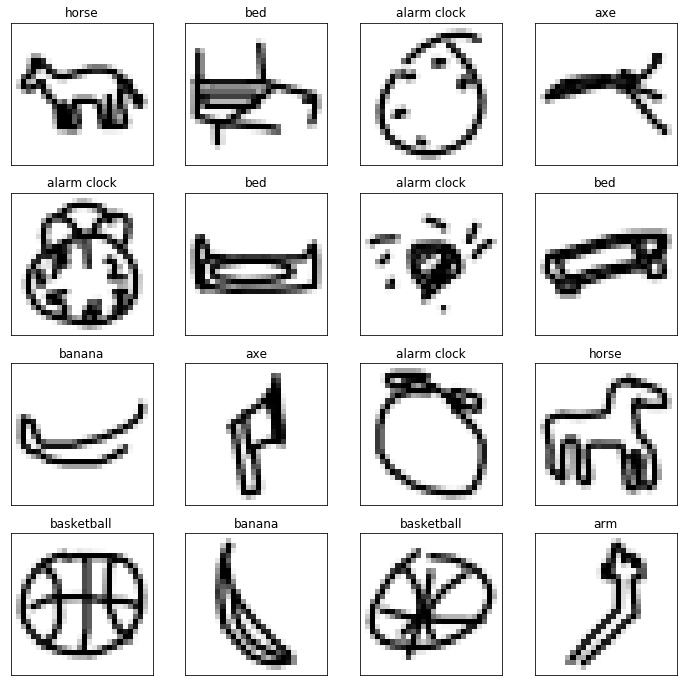

In [31]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    
    # plot - Report 4 - Question 3 - 28 x 28 size image
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    
    """
    # plot - Report 4 - Question 3 - 20 x 20 size image
    plt.imshow(data_train[ind,:].reshape((20,20)),cmap='Greys')
    """
    
    """
    # plot - Report 4 - Question 3 - 20 x 20 size image    
    plt.imshow(data_train[ind,:].reshape((15,15)),cmap='Greys')
    """
    
    """
    # plot - Report 4 - Question 3 - 15 x 15 size image    
    plt.imshow(data_train[ind,:].reshape((15,15)),cmap='Greys')
    """
    
    """
    # plot - Report 4 - Question 3 - 5 x 5 size image    
    plt.imshow(data_train[ind,:].reshape((5,5)),cmap='Greys')
    """
    
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [14]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [15]:
data_train.shape[1]

784

In [9]:
"""
Report 4 - Question 2  - 3 layers added to a 28 x 28 size image

%%time
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(data_train, label_train, epochs=500, batch_size=32)
"""

Epoch 1/500
100000/100000 [==============================] - 8s 84us/step - loss: 2.1831 - accuracy: 0.3665
Epoch 2/500
100000/100000 [==============================] - 8s 78us/step - loss: 1.4936 - accuracy: 0.4839
Epoch 3/500
100000/100000 [==============================] - 8s 81us/step - loss: 1.3660 - accuracy: 0.5339
Epoch 4/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.2877 - accuracy: 0.5610
Epoch 5/500
100000/100000 [==============================] - 8s 77us/step - loss: 1.1979 - accuracy: 0.5901
Epoch 6/500
100000/100000 [==============================] - 8s 79us/step - loss: 1.0938 - accuracy: 0.6338
Epoch 7/500
100000/100000 [==============================] - 8s 79us/step - loss: 1.0675 - accuracy: 0.6447
Epoch 8/500
100000/100000 [==============================] - 8s 80us/step - loss: 1.0672 - accuracy: 0.6448
Epoch 9/500
100000/100000 [==============================] - 8s 78us/step - loss: 1.0557 - accuracy: 0.6474
Epoch 10/500
100000/100000 [

In [15]:
"""
Testing accuracy

predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))
"""

Testing accuracy 0.4288


In [8]:
"""
Report 4 - Question 2  - 5 layers added to a 28 x 28 size image

%%time
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()              
model.fit(data_train, label_train, epochs=500, batch_size=32)
"""

Epoch 1/500
100000/100000 [==============================] - 6s 55us/step - loss: 1.7857 - accuracy: 0.3662
Epoch 2/500
100000/100000 [==============================] - 5s 54us/step - loss: 1.3902 - accuracy: 0.4831
Epoch 3/500
100000/100000 [==============================] - 5s 54us/step - loss: 1.3496 - accuracy: 0.5013
Epoch 4/500
100000/100000 [==============================] - 5s 55us/step - loss: 1.4021 - accuracy: 0.5012
Epoch 5/500
100000/100000 [==============================] - 5s 55us/step - loss: 1.4594 - accuracy: 0.4896
Epoch 6/500
100000/100000 [==============================] - 6s 56us/step - loss: 1.4479 - accuracy: 0.4862
Epoch 7/500
100000/100000 [==============================] - 6s 55us/step - loss: 1.4847 - accuracy: 0.4868
Epoch 8/500
100000/100000 [==============================] - 6s 56us/step - loss: 1.5528 - accuracy: 0.4586
Epoch 9/500
100000/100000 [==============================] - 6s 55us/step - loss: 1.4291 - accuracy: 0.4820
Epoch 10/500
100000/100000 [

In [14]:
"""
Testing accuracy

predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))
"""

Testing accuracy 0.1


In [5]:
"""
Report 4 - Question 3 - 20 x 20 size image with 2 hidden layers

%%time
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
"""

Epoch 1/500
100000/100000 [==============================] - 5s 51us/step - loss: 10.5356 - accuracy: 0.3426
Epoch 2/500
100000/100000 [==============================] - 5s 49us/step - loss: 10.2524 - accuracy: 0.3624
Epoch 3/500
100000/100000 [==============================] - 5s 46us/step - loss: 10.2044 - accuracy: 0.3658
Epoch 4/500
100000/100000 [==============================] - 5s 50us/step - loss: 10.1748 - accuracy: 0.3678
Epoch 5/500
100000/100000 [==============================] - 5s 49us/step - loss: 10.1604 - accuracy: 0.3687
Epoch 6/500
100000/100000 [==============================] - 5s 49us/step - loss: 10.1314 - accuracy: 0.3708
Epoch 7/500
100000/100000 [==============================] - 5s 47us/step - loss: 10.1294 - accuracy: 0.3710
Epoch 8/500
100000/100000 [==============================] - 5s 48us/step - loss: 10.1131 - accuracy: 0.3719: 1s - lo
Epoch 9/500
100000/100000 [==============================] - 5s 49us/step - loss: 10.1084 - accuracy: 0.3722
Epoch 10/5

In [6]:
"""
Testing accuracy

predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))
"""

Testing accuracy 0.67284


In [12]:
"""
Report 4 - Question 3  - 15 x 15 size image with 2 hidden layers

%%time
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
"""

Epoch 1/500
100000/100000 [==============================] - 4s 42us/step - loss: 9.8873 - accuracy: 0.3824
Epoch 2/500
100000/100000 [==============================] - 4s 41us/step - loss: 8.4520 - accuracy: 0.4719
Epoch 3/500
100000/100000 [==============================] - 4s 44us/step - loss: 8.0744 - accuracy: 0.4958
Epoch 4/500
100000/100000 [==============================] - 4s 42us/step - loss: 7.8797 - accuracy: 0.5087
Epoch 5/500
100000/100000 [==============================] - 4s 41us/step - loss: 7.6945 - accuracy: 0.5207
Epoch 6/500
100000/100000 [==============================] - 4s 44us/step - loss: 7.5950 - accuracy: 0.5268
Epoch 7/500
100000/100000 [==============================] - 4s 43us/step - loss: 7.5025 - accuracy: 0.5326
Epoch 8/500
100000/100000 [==============================] - 4s 42us/step - loss: 7.4564 - accuracy: 0.5357
Epoch 9/500
100000/100000 [==============================] - 4s 42us/step - loss: 7.4215 - accuracy: 0.5381
Epoch 10/500
100000/100000 [

In [13]:
"""
Testing accuracy

predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))
"""

Testing accuracy 0.5968


In [11]:
"""
Report 4 - Question 3 - 10 x 10 size image with 2 hidden layers

%%time
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()              
model.fit(data_train, label_train, epochs=500, batch_size=32)
"""

Epoch 1/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.6686 - accuracy: 0.5896
Epoch 2/500
100000/100000 [==============================] - 4s 36us/step - loss: 1.0646 - accuracy: 0.6861
Epoch 3/500
100000/100000 [==============================] - 4s 37us/step - loss: 1.0417 - accuracy: 0.7003
Epoch 4/500
100000/100000 [==============================] - 4s 40us/step - loss: 1.0604 - accuracy: 0.7071
Epoch 5/500
100000/100000 [==============================] - 4s 39us/step - loss: 1.0672 - accuracy: 0.7109
Epoch 6/500
100000/100000 [==============================] - 4s 39us/step - loss: 1.0829 - accuracy: 0.7082
Epoch 7/500
100000/100000 [==============================] - 4s 39us/step - loss: 1.1014 - accuracy: 0.7003
Epoch 8/500
100000/100000 [==============================] - 4s 43us/step - loss: 1.1159 - accuracy: 0.6945
Epoch 9/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.1386 - accuracy: 0.6860
Epoch 10/500
100000/100000 [

In [15]:
"""
Testing accuracy

predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))
"""

Testing accuracy 0.72948


In [ ]:
"""
Report 4 - Question 3 - 5 x 5 size image with 2 hidden layers

%%time
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()              
model.fit(data_train, label_train, epochs=500, batch_size=32)
"""

Epoch 1/500
100000/100000 [==============================] - 6s 61us/step - loss: 1.1103 - accuracy: 0.7017
Epoch 2/500
100000/100000 [==============================] - 6s 58us/step - loss: 0.8202 - accuracy: 0.7631
Epoch 3/500
100000/100000 [==============================] - 6s 57us/step - loss: 0.7949 - accuracy: 0.7729
Epoch 4/500
100000/100000 [==============================] - 6s 57us/step - loss: 0.7825 - accuracy: 0.7760
Epoch 5/500
100000/100000 [==============================] - 6s 60us/step - loss: 0.7693 - accuracy: 0.7812
Epoch 6/500
100000/100000 [==============================] - 6s 58us/step - loss: 0.7528 - accuracy: 0.7865
Epoch 7/500
100000/100000 [==============================] - 6s 62us/step - loss: 0.7445 - accuracy: 0.7907
Epoch 8/500
100000/100000 [==============================] - 6s 59us/step - loss: 0.7276 - accuracy: 0.7935
Epoch 9/500
100000/100000 [==============================] - 6s 59us/step - loss: 0.7302 - accuracy: 0.7948
Epoch 10/500
100000/100000 [

In [9]:
"""
Testing accuracy

predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))


Testing accuracy 0.6418


**WARNING**: This cell will take a significantly long time to run

In [27]:
"""
Report 4 - Question 1 - 28 x 28 image with two hidden layers
"""

%%time
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(data_train, label_train, epochs=500, batch_size=32)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
100000/100000 [==============================] - 8s 82us/step - loss: 3.2113 - accuracy: 0.6147
Epoch 2/500
100000/100000 [==============================] - 8s 85us/step - loss: 1.4194 - accuracy: 0.6948
Epoch 3/500
100000/100000 [==============================] - 8s 85us/step - loss: 1.3944 - accuracy: 0.7077
Epoch 4/500
100000/100000 [==============================] - 8s 83us/step - loss: 1.3804 - accuracy: 0.7148
Epoch 5/500
100000/100000 [==============================] - 9s 87us/step - lo

In [28]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')

In [29]:
from numpy import loadtxt
from keras.models import load_model

model = load_model('pa2-part2-model.h5')

In [30]:
"""
Report 4 - Question 3 - 28 x 28 image with two hidden layers - Testing accuracy
"""

predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.68376
